# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
df.head()
df.shape

(1893, 8)

In [2]:
# Checking the number of mice.
df['Mouse ID'].value_counts()

g989    13
j365    10
z969    10
a203    10
c302    10
        ..
n482     1
h428     1
t573     1
l872     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = df.set_index('Mouse ID')

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
# Checked that the rows have decreased by 13 (the number of rows for mouse 'g989')
# Used .shape to check the rows/columns in the clean_df
clean_df.shape

(1880, 7)

In [9]:
# Checking the number of mice in the clean DataFrame.
# Checked that the rows have decreased by 13 (the number of rows for mouse 'g989')
# Used .shape to check the rows/columns in the clean_df
clean_df.shape

(1880, 7)

In [14]:
# Created a dataframe that reset the index 'Mouse ID' as a column just in case we need it later.
# Used .reset_index()
clean_df2 = clean_df.reset_index()
# Checking the number of mice in the clean DataFrame.
clean_df2['Mouse ID'].value_counts()

c302    10
t451    10
f345    10
a444    10
w575    10
        ..
l872     1
u153     1
b447     1
x336     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df2.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median" : tumor_med,
                        "Variance" : tumor_var,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_sem
                        })
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor2 = clean_df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

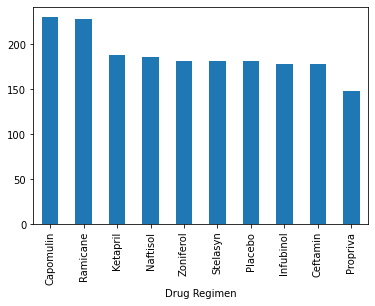

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = clean_df2.groupby(['Drug Regimen'])['Timepoint'].count() 
timepoint.sort_values(ascending=False).plot.bar()  
plt.show()

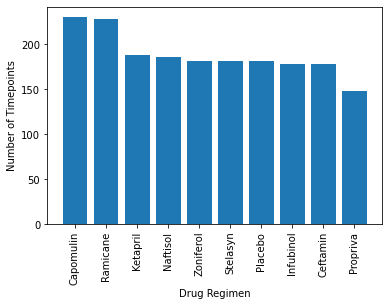

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_desc = timepoint.sort_values(ascending=False)
plt.bar(timepoint_desc.index, timepoint_desc.values) 
#clean up clean up
plt.ylabel('Number of Timepoints', size=10)
plt.xlabel('Drug Regimen') 
plt.xticks(rotation='vertical')
plt.show()

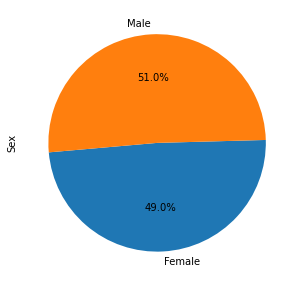

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df2.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))

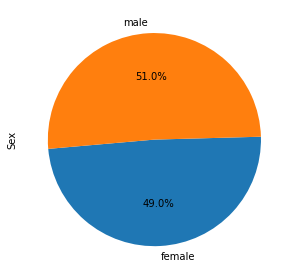

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex')
#trying to make it all look pretty
plt.tight_layout() 
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = clean_df2.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm) #to have df for merging reasons

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df2, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()

In [ ]:
#I feel like there is an easy way but my brain is DEAD
quart_cap = drug_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatments[0]].max()
min_cap = drug_df[treatments[0]].min()

quart_ram = drug_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatments[1]].max()
min_ram = drug_df[treatments[1]].min()

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()

quart_cef = drug_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatments[3]].max()
min_cef = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

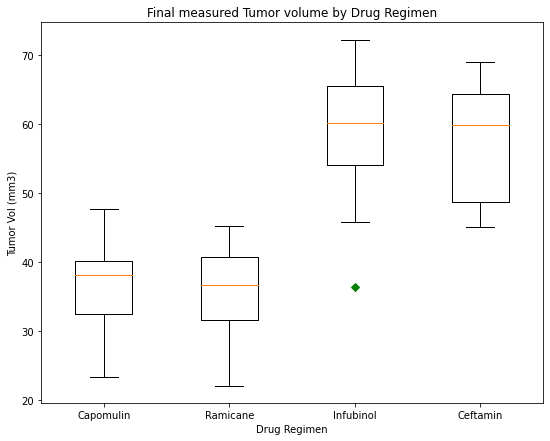

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)') 
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

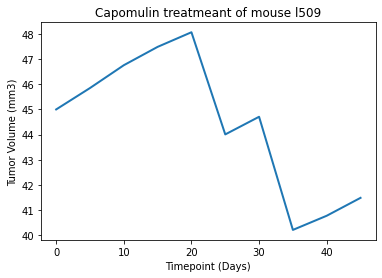

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df2.loc[clean_df2["Mouse ID"] == "l509",:]
line_df
x_axisTP = line_df["Timepoint"] 
tumsiz = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') 
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

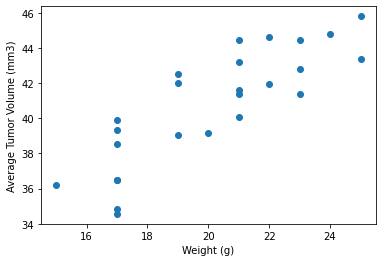

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capavg = cap_df.groupby(['Mouse ID']).mean()
#SCATTER
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [32]:
#breaking this one up so my head doesn't explode
slope, intercept, rvalue, pvalue, stderr=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])

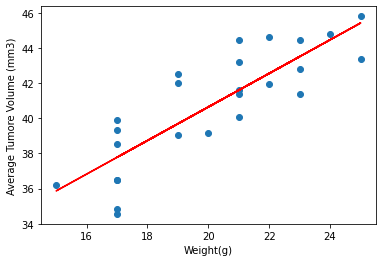

In [33]:
line = slope*(capavg['Weight (g)'])+intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.savefig('linearregression')
plt.show()
